In [56]:
import numpy as np

def inverse(matrix):
    if  matrix.shape[0] != matrix.shape[1]:
        print("Input matrix is not square.")
        return np.zeros_like(matrix)
    if np.linalg.det(matrix) == 0:
        print("Input sqaure matrix has determinant 0")
        return np.zeros_like(matrix)

    n = matrix.shape[0]
    # Augmenting the matrix with the identity matrix of the same size
    augmented_matrix = np.hstack((matrix, np.identity(n)))

    # Applying Gauss-Jordan elimination
    for i in range(n):
        # If diagonal element is zero, swap rows
        if augmented_matrix[i, i] == 0:
            for j in range(i+1, n):
                if augmented_matrix[j, i] != 0:
                    augmented_matrix[[i, j]] = augmented_matrix[[j, i]]
                    break

        # Divide the row by the diagonal element to make it 1
        augmented_matrix[i] /= augmented_matrix[i, i]

        # Subtracting the multiple of current row from all other rows to make elements below the diagonal zero
        for j in range(n):
            if i != j:
                augmented_matrix[j] -= augmented_matrix[j, i] * augmented_matrix[i]

    # Extracting the inverse matrix from the augmented matrix
    inverse_matrix = augmented_matrix[:, n:]

    return inverse_matrix

In [57]:
def test(matrix):
    if  matrix.shape[0] != matrix.shape[1]:
        print("Input matrix is not square.")
        print(np.zeros_like(matrix))
        return False
    elif np.linalg.det(matrix) == 0:
        print("Input sqaure matrix has determinant 0")
        print(np.zeros_like(matrix))
        return False

    if matrix.shape[0] == matrix.shape[1]:
        numpy_inverse = np.linalg.inv(matrix)
    custom_inverse = inverse(matrix)

    if np.allclose(numpy_inverse, custom_inverse):
        return True
    else:
        return False

In [59]:
flag = True
for i in range(908):
    n = np.random.randint(2,6)
    m = n + (np.random.randint(0,2) % 2 != 0)
    matrix = np.random.randint(0, 20, size=(n,m)) + np.random.rand(n,m)
    if (not test(matrix)):
        flag = False
        print("You passed", i, "testcases:(")
        break
if (flag):
    print("Congrats!!! You passed all testcases")

Input matrix is not square.
[[0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0.]]
You passed 1 testcases:(


In [61]:
import pandas as pd
import matplotlib.pyplot as plt

Total number of cases of irradiat: 17


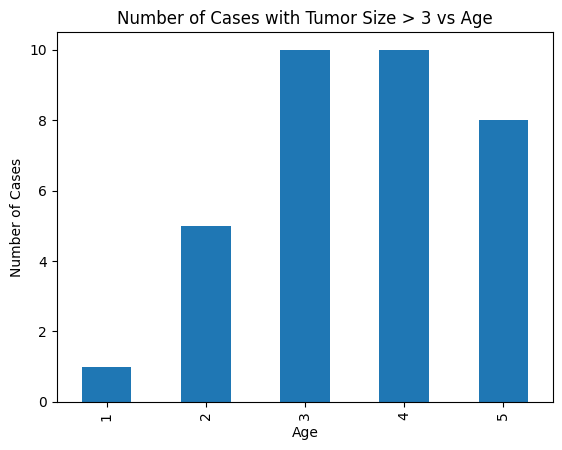

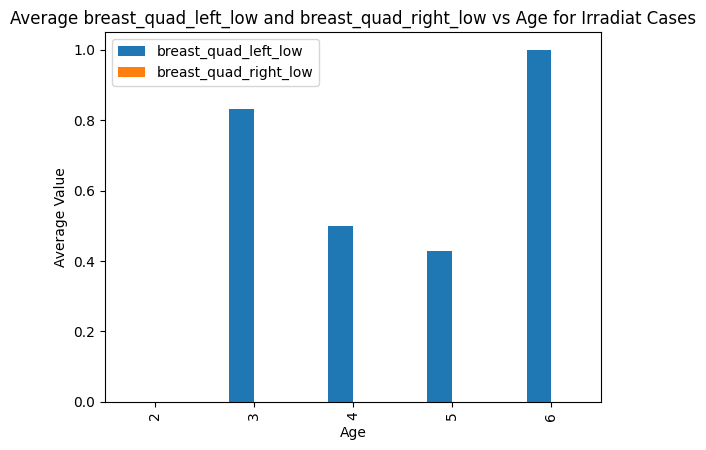

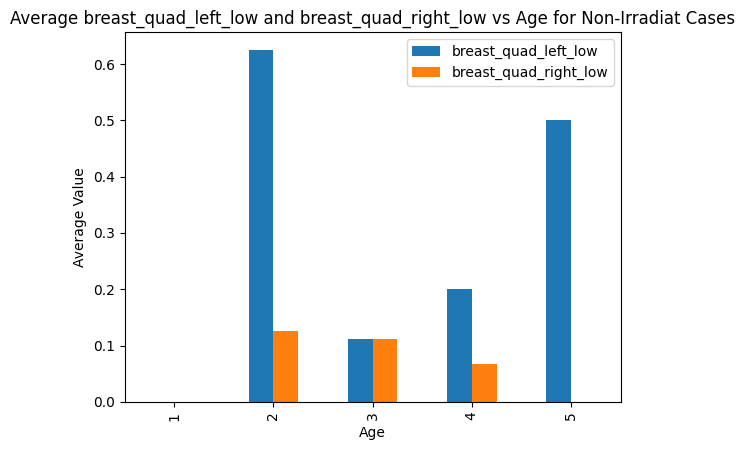

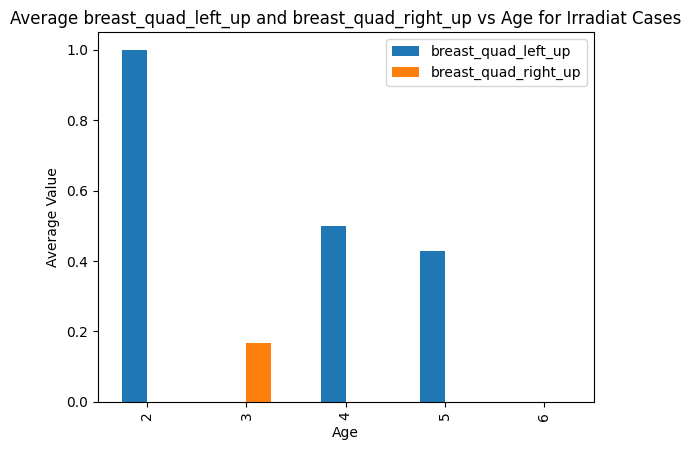

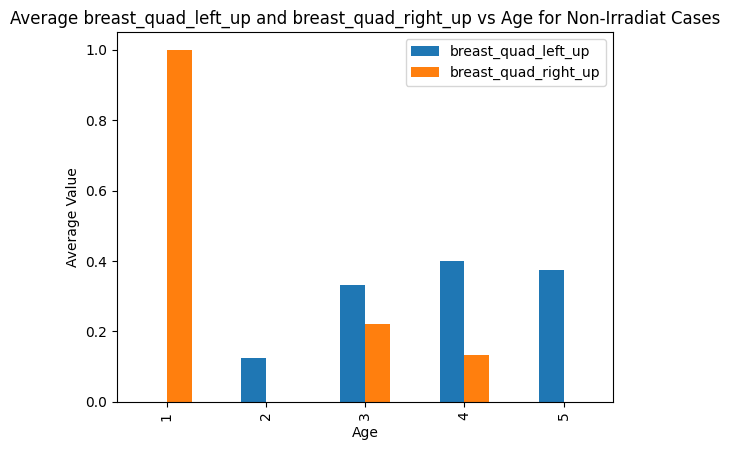

In [105]:
data = pd.read_csv("data.csv")
tumor_size_gt3 = data[data['tumor_size'] > 3].groupby('age').size()
tumor_size_gt3.plot(kind='bar')
plt.title('Number of Cases with Tumor Size > 3 vs Age')
plt.xlabel('Age')
plt.ylabel('Number of Cases')

irradiat_cases = data[data['irradiat'] == 1]
avg_low_irradiat = irradiat_cases.groupby('age')[['breast_quad_left_low', 'breast_quad_right_low']].mean()
avg_low_irradiat.plot(kind='bar')
plt.title('Average breast_quad_left_low and breast_quad_right_low vs Age for Irradiat Cases')
plt.xlabel('Age')
plt.ylabel('Average Value')

non_irradiat_cases = data[data['irradiat'] == 0]
avg_low_non_irradiat = non_irradiat_cases.groupby('age')[['breast_quad_left_low', 'breast_quad_right_low']].mean()
avg_low_non_irradiat.plot(kind='bar')
plt.title('Average breast_quad_left_low and breast_quad_right_low vs Age for Non-Irradiat Cases')
plt.xlabel('Age')
plt.ylabel('Average Value')

avg_high_irradiat = irradiat_cases.groupby('age')[['breast_quad_left_up', 'breast_quad_right_up']].mean()
avg_high_irradiat.plot(kind='bar')
plt.title('Average breast_quad_left_up and breast_quad_right_up vs Age for Irradiat Cases')
plt.xlabel('Age')
plt.ylabel('Average Value')

avg_high_non_irradiat = non_irradiat_cases.groupby('age')[['breast_quad_left_up', 'breast_quad_right_up']].mean()
avg_high_non_irradiat.plot(kind='bar')
plt.title('Average breast_quad_left_up and breast_quad_right_up vs Age for Non-Irradiat Cases')
plt.xlabel('Age')
plt.ylabel('Average Value')

total_irradiat_cases = data['irradiat'].sum()
print("Total number of cases of irradiat:", total_irradiat_cases)